In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
cost_mu, cost_sigma = 500, 75

def A(t):
    return np.random.normal(cost_mu, cost_sigma)

def B(t):
    return cost_mu + cost_sigma*3 *np.sin(2*np.pi/20*t)

def C(t):
    return cost_mu + cost_sigma*3 *(-np.sin(2*np.pi/20*t))

In [32]:
def getRewards(prices_arr):
    k = [None] * len(prices_arr) 
    for i in range(len(prices_arr)):
        if prices_arr[i] == min(prices_arr):
            k[i] = 1
        elif prices_arr[i] == max(prices_arr):
            k[i] = 0
        else:
            k[i] = 0.5
    return k

def bestActionAccumulatedReward(prices_arr):
    return np.max(np.sum(rewards,axis=0))

In [84]:
T = 1000
K = 3

weight=[1,1,1]
prob=[[1] * K for x in range(0,T+2)] # 0: use origin, 1: use card

rewards=[[0,0,0]]

rewards_exp3 = [0]

gamma = 0.02

z=[]
z_weight=[]

best_action_accumulated_reward = 0

for i in range(1,T+1):
    rewards.append(getRewards([A(i), B(i), C(i)]))
    best_action_accumulated_reward = bestActionAccumulatedReward(rewards[i])
    
    # exp3
    for arm in range(K):
        prob[i][arm] = (1 - gamma)*(weight[arm])/np.sum(weight) + gamma/K
        
    prob[i]=prob[i]/np.sum(prob[i]) 
    #print((1 - gamma)*(weight[arm])/np.sum(weight),gamma/K,prob[i])
        
    draw = int(np.random.choice([0,1,2], 1, p=np.array(prob[i]/np.sum(prob[i])) )) # normolize
    
    actions_exp3.append(draw)
    observed_reward = rewards[i][draw]

    rewards_exp3.append(observed_reward) # play arm, get a reward
               
    weak_regret = best_action_accumulated_reward - sum(rewards_exp3) # weak_regret >= 0
    
    #periodic_regret = 
    #print(best_action_accumulated_reward -sum(rewards_exp3),"action:", draw)
        
    regrets_exp3.append(weak_regret) # observe a regret

    x = rewards_exp3[i] / prob[i][draw]
    weight[draw] = weight[draw]*np.exp(gamma*x/K)
    weight= weight / np.sum(weight)
    
    #print(weight)
    
    z.append({"t": i, "regret": weak_regret,"regret_mean": weak_regret / i, "method": "exp3"})
    
    for arm in range(K):
        z_weight.append({"t": i, "weight": weight[arm], "legend": chr(int(arm)+65)})

df=pd.DataFrame(z)
df_weight=pd.DataFrame(z_weight)

Text(0, 0.5, 'Weak Regret')

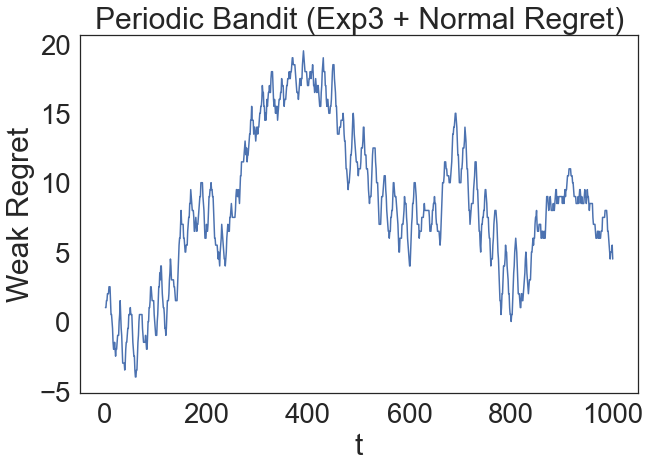

In [85]:
sns.set_theme(style="white", font_scale=2.5)
plt.figure(figsize=(10,6.6))
ax1 = sns.lineplot(x="t",y="regret",data=df)
ax1.set_title("Periodic Bandit (Exp3 + Normal Regret)")
ax1.set_xlabel("t")
ax1.set_ylabel("Weak Regret")

In [86]:
ax1.figure.savefig("regret_exp3_normal3.png")

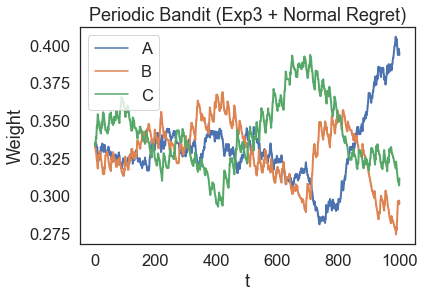

In [87]:
sns.set_theme(style="white", font_scale=1.5)
ax2 = sns.lineplot(x="t",y="weight",data=df_weight,hue="legend", linewidth = 2)
ax2.set_title("Periodic Bandit (Exp3 + Normal Regret)")
ax2.set_xlabel("t")
ax2.set_ylabel("Weight")
ax2.legend().set_title(title=None)

In [88]:
ax2.figure.savefig("weight_normal3.png")

<AxesSubplot:xlabel='t', ylabel='regret_mean'>

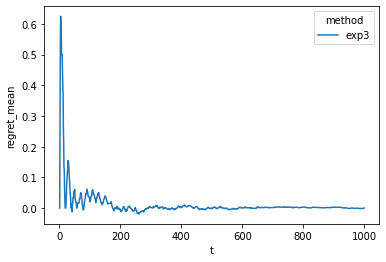

In [30]:
sns.lineplot(x="t",y="regret_mean",data=df,hue="method")